# NST Preprocessing Experiment (NPE):
## Stats of topic models from all versions of data in NPE

Calculating topic coherence and topic diversity on the topicset geneated by LDA and Top2Vec models from each of the NPE datasets.

In [8]:
# Imports
import csv
import os
import glob
import random
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from PIL.ImageColor import colormap


NST_SAMPLE_SIZE = 1000
PIPELINE = "Pipeline"
NUM_TOPIC_WORDS = 10

COLORMAP = list(colormap.keys())

In [9]:
# Get statistics from each pipeline stats file

dataset_stats_folder_path = r"../../nst_preprocessing_experiment/preprocessed_data/stats/"

combined_dataset_stats_folder_path = r"../../nst_preprocessing_experiment/results/combined_dataset_stats/"
combined_dataset_stats_file_name = f"npe_{NST_SAMPLE_SIZE}_combined_dataset_stats.csv"
combined_dataset_stats_path = os.path.join(combined_dataset_stats_folder_path + combined_dataset_stats_file_name)

dataset_stats_df = None
dataset_stats = {}
columns = None

if os.path.exists(combined_dataset_stats_path):
    dataset_stats_df = pd.read_csv(combined_dataset_stats_path)

else:
    stat_files = []
    if os.path.isdir(dataset_stats_folder_path):
        stat_files = glob.glob(dataset_stats_folder_path + "/*.csv")

    STAT = "Stat"
    VALUE = "Value"

    for file_name in stat_files:
        with open(file_name, encoding="utf-8", mode="r") as dataset_stats_file:
            reader = csv.DictReader(dataset_stats_file, delimiter=";")
            for row in reader:
                stat = row[STAT]
                value = row[VALUE]
                pipeline = file_name[68:-10]
                if not pipeline in dataset_stats:
                    dataset_stats[pipeline] = {stat : value}
                else:
                    dataset_stats[pipeline][stat] = value
    dataset_stats_df = pd.DataFrame.from_dict(dataset_stats, orient="index")
    dataset_stats_df.index.name = PIPELINE
    dataset_stats_df.to_csv(combined_dataset_stats_path)

In [10]:
dataset_stats_df

,Pipeline,dataset_size,vocab_size,total_tokens,avg_token_freq,avg_token_per_doc,avg_stopwords_per_doc
0,basic,999,81649,604211,7.400103,604.815816,0.000000
1,lemmatized,999,64426,610326,9.473287,610.936937,0.000000
2,lem_tfidf,999,17784,498286,28.018781,498.784785,0.000000
3,pos_only_noun,999,13753,288623,20.986185,288.911912,0.000000
4,pos_verb,999,16296,395655,24.279271,396.051051,0.000000
5,raw,999,95757,1777144,18.558894,1778.922923,971.926927
6,unprocessed,999,149975,1825168,12.169815,1826.994995,880.986987


In [11]:
# Get statistics from each pipeline topic stats file

topic_stats_folder_path = r"../../nst_preprocessing_experiment/results/topic_stats/"

combined_topic_stats_folder_path = r"../../nst_preprocessing_experiment/results/combined_topic_stats/"
combined_topic_stats_file_name = f"npe_{NST_SAMPLE_SIZE}_combined_topic_stats.csv"
combined_topic_stats_path = os.path.join(combined_topic_stats_folder_path + combined_topic_stats_file_name)

topic_stats_df = None
topic_stats = {}
columns = None

if os.path.exists(combined_topic_stats_path):
    topic_stats_df = pd.read_csv(combined_topic_stats_path)

else:
    stat_files = []
    if os.path.isdir(topic_stats_folder_path):
        stat_files = glob.glob(topic_stats_folder_path + "/*.csv")

    TOPIC_STAT = "Topic stat"
    VALUE = "Value"

    #topic_stats = {}

    for file_name in stat_files:
        with open(file_name, encoding="utf-8", mode="r") as topic_stats_file:
            reader = csv.DictReader(topic_stats_file, delimiter=";")
            for row in reader:
                stat = row[TOPIC_STAT]
                value = row[VALUE]
                pipeline = file_name[64:-16]
                if not pipeline in topic_stats:
                    topic_stats[pipeline] = {stat : value}
                else:
                    topic_stats[pipeline][stat] = value
    topic_stats_df = pd.DataFrame.from_dict(topic_stats, orient="index")
    topic_stats_df.index.name = PIPELINE
    topic_stats_df.to_csv(combined_topic_stats_path)

In [16]:
pipeline_ordering = ["unprocessed", "raw", "basic", "lemmatized", "lem_tfidf", "pos_verb", "pos_only_noun"]
topic_stats_df[PIPELINE] = pd.Categorical(topic_stats_df[PIPELINE], pipeline_ordering)
dataset_stats_df[PIPELINE] = pd.Categorical(dataset_stats_df[PIPELINE], pipeline_ordering)
topic_stats_df.sort_values(PIPELINE)

,Pipeline,LDA_coherence,LDA_diversity,Top2Vec_coherence,Top2Vec_diversity
6,unprocessed,0.434148,0.1625,0.087539,0.957143
5,raw,0.443079,0.2125,0.228200,0.944444
0,basic,0.806377,0.3000,0.563426,1.000000
1,lemmatized,0.711967,0.2250,0.617827,1.000000
2,lem_tfidf,0.908984,0.5125,0.523307,0.928571
4,pos_verb,0.913089,0.4000,0.336130,0.916667
3,pos_only_noun,0.951185,0.3750,-0.251653,0.650000


In [15]:
dataset_stats_df.sort_values(PIPELINE)

,Pipeline,dataset_size,vocab_size,total_tokens,avg_token_freq,avg_token_per_doc,avg_stopwords_per_doc
6,unprocessed,999,149975,1825168,12.169815,1826.994995,880.986987
5,raw,999,95757,1777144,18.558894,1778.922923,971.926927
0,basic,999,81649,604211,7.400103,604.815816,0.000000
1,lemmatized,999,64426,610326,9.473287,610.936937,0.000000
2,lem_tfidf,999,17784,498286,28.018781,498.784785,0.000000
4,pos_verb,999,16296,395655,24.279271,396.051051,0.000000
3,pos_only_noun,999,13753,288623,20.986185,288.911912,0.000000


In [4]:
topic_stats_df.sort_values(axis=0, by="LDA_coherence", ascending=False)

,Pipeline,LDA_coherence,LDA_diversity,Top2Vec_coherence,Top2Vec_diversity
3,pos_only_noun,0.951185,0.3750,-0.251653,0.650000
4,pos_verb,0.913089,0.4000,0.336130,0.916667
2,lem_tfidf,0.908984,0.5125,0.523307,0.928571
0,basic,0.806377,0.3000,0.563426,1.000000
1,lemmatized,0.711967,0.2250,0.617827,1.000000
5,raw,0.443079,0.2125,0.228200,0.944444
6,unprocessed,0.434148,0.1625,0.087539,0.957143


In [5]:
topic_stats_df.sort_values(axis=0, by="LDA_diversity", ascending=False)

,Pipeline,LDA_coherence,LDA_diversity,Top2Vec_coherence,Top2Vec_diversity
2,lem_tfidf,0.908984,0.5125,0.523307,0.928571
4,pos_verb,0.913089,0.4000,0.336130,0.916667
3,pos_only_noun,0.951185,0.3750,-0.251653,0.650000
0,basic,0.806377,0.3000,0.563426,1.000000
1,lemmatized,0.711967,0.2250,0.617827,1.000000
5,raw,0.443079,0.2125,0.228200,0.944444
6,unprocessed,0.434148,0.1625,0.087539,0.957143


In [6]:
topic_stats_df.sort_values(axis=0, by="Top2Vec_coherence", ascending=False)

,Pipeline,LDA_coherence,LDA_diversity,Top2Vec_coherence,Top2Vec_diversity
1,lemmatized,0.711967,0.2250,0.617827,1.000000
0,basic,0.806377,0.3000,0.563426,1.000000
2,lem_tfidf,0.908984,0.5125,0.523307,0.928571
4,pos_verb,0.913089,0.4000,0.336130,0.916667
5,raw,0.443079,0.2125,0.228200,0.944444
6,unprocessed,0.434148,0.1625,0.087539,0.957143
3,pos_only_noun,0.951185,0.3750,-0.251653,0.650000


In [7]:
topic_stats_df.sort_values(axis=0, by="Top2Vec_diversity", ascending=False)

,Pipeline,LDA_coherence,LDA_diversity,Top2Vec_coherence,Top2Vec_diversity
0,basic,0.806377,0.3000,0.563426,1.000000
1,lemmatized,0.711967,0.2250,0.617827,1.000000
6,unprocessed,0.434148,0.1625,0.087539,0.957143
5,raw,0.443079,0.2125,0.228200,0.944444
2,lem_tfidf,0.908984,0.5125,0.523307,0.928571
4,pos_verb,0.913089,0.4000,0.336130,0.916667
3,pos_only_noun,0.951185,0.3750,-0.251653,0.650000


In [9]:
topic_stats_df = topic_stats_df.sort_values(PIPELINE)

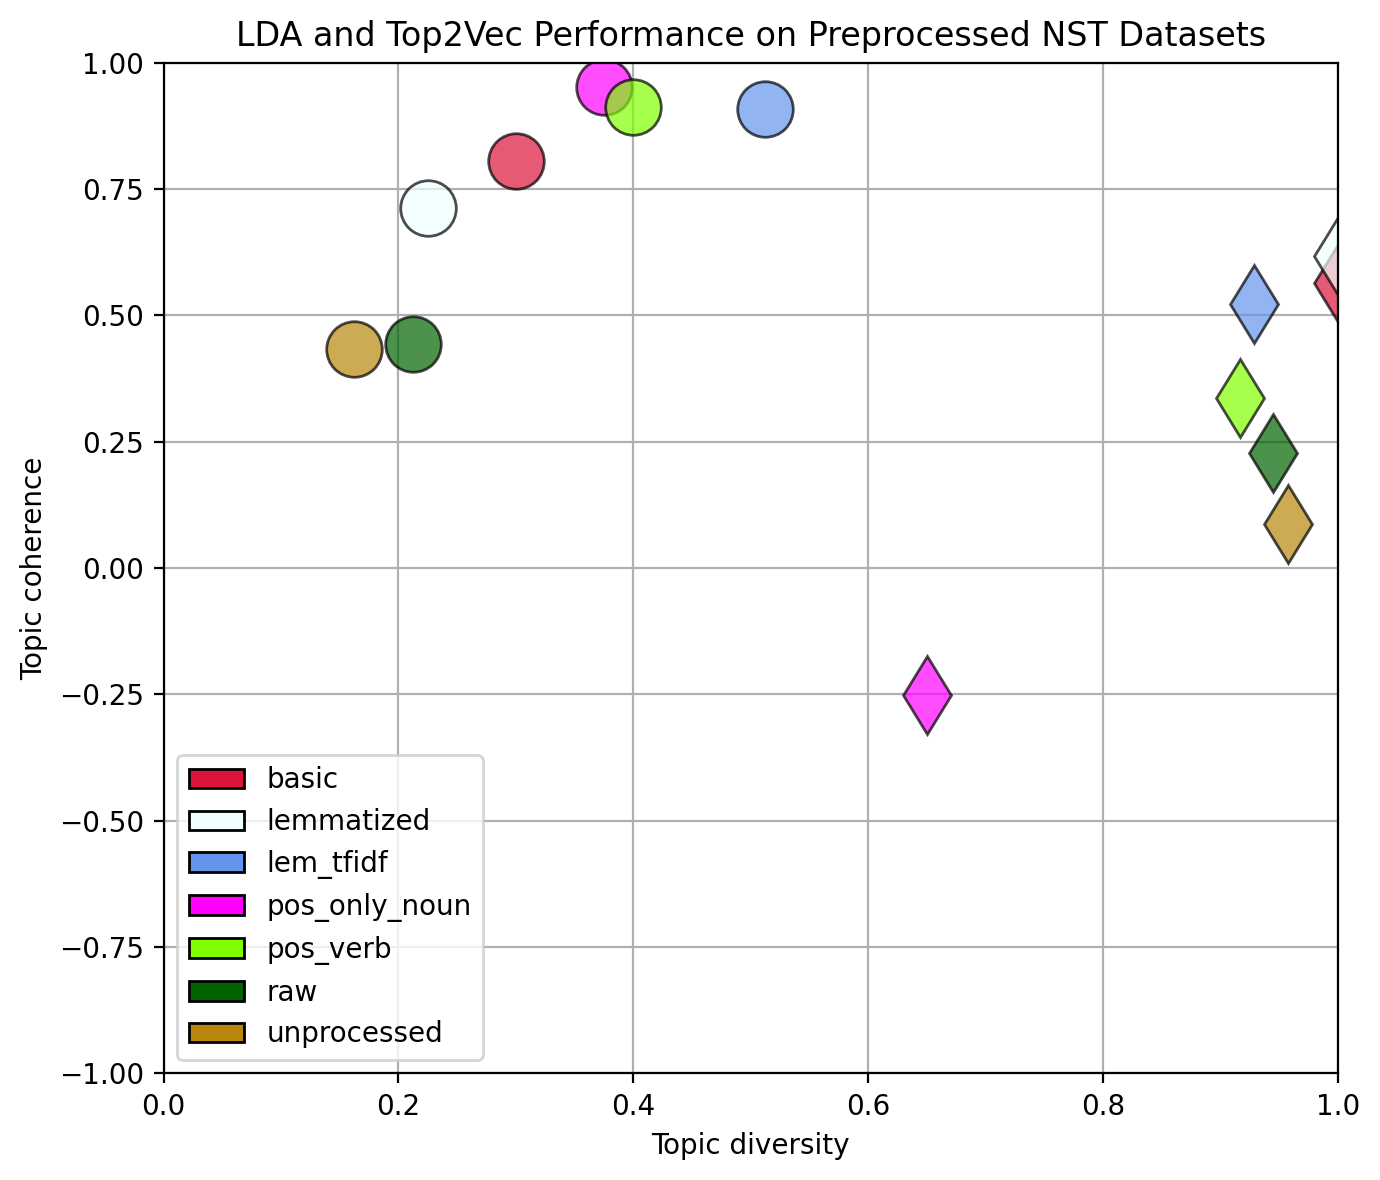

In [71]:
plt.rcParams["figure.figsize"] = [7.00, 6.00]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 200
lda_coherence = topic_stats_df["LDA_coherence"].to_list()
lda_diversity = topic_stats_df["LDA_diversity"].to_list()
top2vec_coherence = topic_stats_df["Top2Vec_coherence"].to_list()
top2vec_diversity = topic_stats_df["Top2Vec_diversity"].to_list()
colors = [COLORMAP[random.randrange(0, len(COLORMAP))] for i in range(len(lda_coherence))]
legend_labels = topic_stats_df[PIPELINE].to_list()
legend_handles = [Rectangle((0, 0), width=5, height=5, facecolor=color, edgecolor="black") for color in colors]
plt.xlim(0.0, 1.0)
plt.xlabel("Topic diversity")
plt.ylim(-1.0, 1.0)
plt.ylabel("Topic coherence")
plt.title("LDA and Top2Vec Performance on Preprocessed NST Datasets")
plt.grid()
plt.autoscale(False)

for i in range(len(lda_coherence)):
    plt.plot(lda_diversity[i], lda_coherence[i], marker="o", markersize=20, alpha=0.7, markerfacecolor=colors[i], markeredgecolor="black")
    plt.plot(top2vec_diversity[i], top2vec_coherence[i], marker="d", markersize=20, alpha=0.7, markerfacecolor=colors[i], markeredgecolor="black")
plt.legend(legend_handles, legend_labels, loc="lower left")
plt.show()